In [54]:
# Importamos las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Cargamos el archivo base sobre el cual realizaremos el análisis exploratorio

In [55]:
# Cargar el archivo CSV (cambia la ruta al archivo que deseas analizar)
df = pd.read_csv("datos_limpios.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Argentina,Suite,3,2023/08/01,Persona que viaja sola,2023/09/04,Excelente,10,El trato del personal fue excelente. Siempre b...,Al costo de la estadía se le suma un cargo por...,Sí
1,Estados Unidos,Suite,1,2024/09/01,Persona que viaja sola,2024/10/22,Excepcional,10,La comodidad,NaN,Sí
2,Colombia,Suite Junior,1,2024/10/01,En pareja,2024/10/15,Excepcional,10,"Nos gustó todo a mi pareja y a mi, todo muy có...",Considero que el desayuno pudo estar mejor,Sí
3,Colombia,Habitación Doble - 2 camas,1,2024/08/01,En grupo,2024/10/10,Uno de los mejores hoteles en la zona de chapi...,10,"La habitación es perfecta, cómoda, amplia e in...","No hay algo por lo cual decir que no me gusto,...",Sí
4,Colombia,Suite,1,2024/10/01,En pareja,2024/10/07,Diferente,10,"El tipo de lugar, cómodo privado sencillo pero...",NaN,Sí


Mostramos las primeras filas del dataframe para tener una idea general

In [56]:
# Mostrar las primeras filas del DataFrame para tener una idea general
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
             País                 Acomodación  Noches Fecha hospedaje  \
0       Argentina                       Suite       3      2023/08/01   
1  Estados Unidos                       Suite       1      2024/09/01   
2        Colombia                Suite Junior       1      2024/10/01   
3        Colombia  Habitación Doble - 2 camas       1      2024/08/01   
4        Colombia                       Suite       1      2024/10/01   

              Grupo viaje Fecha reseña  \
0  Persona que viaja sola   2023/09/04   
1  Persona que viaja sola   2024/10/22   
2               En pareja   2024/10/15   
3                En grupo   2024/10/10   
4               En pareja   2024/10/07   

                                              Titulo Calificación  \
0                                          Excelente           10   
1                                        Excepcional           10   
2                                        Excepcional           10   
3 

Realizamos la descripción estadística de las columnas numéricas

In [57]:
# Descripción estadística de las columnas numéricas
print("\nDescripción estadística:")
print(df.describe())



Descripción estadística:
             Noches
count  19903.000000
mean       2.286037
std        1.889371
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       33.000000


Mostramos la información general sobre el Dataframe

In [58]:
# Información general sobre el DataFrame
print("\nInformación general:")
print(df.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19903 entries, 0 to 19902
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   País             19818 non-null  object
 1   Acomodación      19903 non-null  object
 2   Noches           19903 non-null  int64 
 3   Fecha hospedaje  19903 non-null  object
 4   Grupo viaje      19903 non-null  object
 5   Fecha reseña     19903 non-null  object
 6   Titulo           19896 non-null  object
 7   Calificación     19903 non-null  object
 8   Cosas Positivas  16108 non-null  object
 9   Cosas Negativas  11682 non-null  object
 10  reseña           19903 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB
None


Comprobamos si hay valores nulos en las diferentes columnas

In [59]:
# Comprobar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
País                 85
Acomodación           0
Noches                0
Fecha hospedaje       0
Grupo viaje           0
Fecha reseña          0
Titulo                7
Calificación          0
Cosas Positivas    3795
Cosas Negativas    8221
reseña                0
dtype: int64


Verificamos la cantidad de países analizados en el muestreo, destacando aquellos con frecuencias mayores a 25 (Representativos). Colombia, España, Estados Unidos y México ocupan la mayor población de análisis, siendo Colombia el 90% del muestreo.

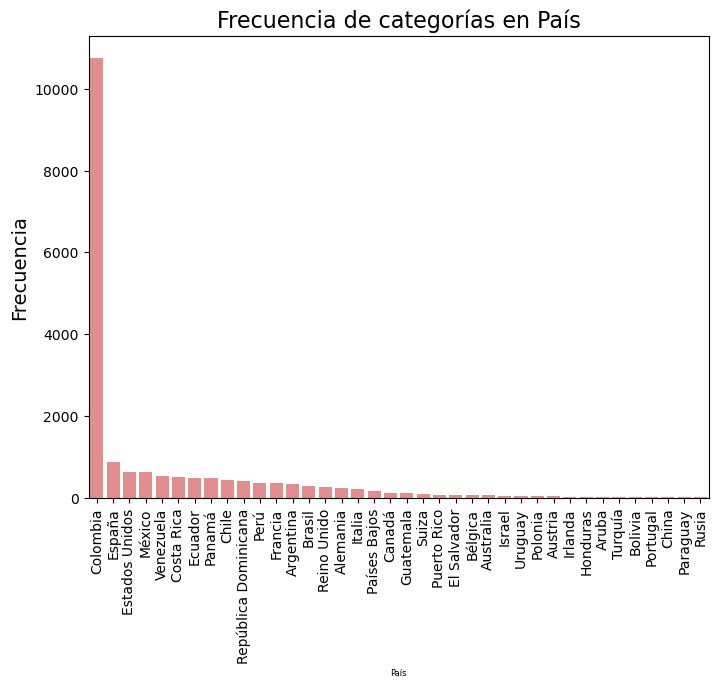

In [60]:
#Cantidad de paises del muestreo
columna = 'País'
frecuencias = df[columna].value_counts()

# Eliminar categorías con pocas ocurrencias, por ejemplo, menos de 25
frecuencias_filtradas = frecuencias[frecuencias >= 25]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencias_filtradas.index, y=frecuencias_filtradas.values, color='lightcoral')
plt.title(f"Frecuencia de categorías en {columna}", fontsize=16)
plt.xlabel(columna, fontsize=6)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()

Reallizamos el mismo análisis de frecuencia para la categoría de acomodación. Aquí la opción Suite fue la que más fue contratada, junto con Suite Junior y Habitación doble.

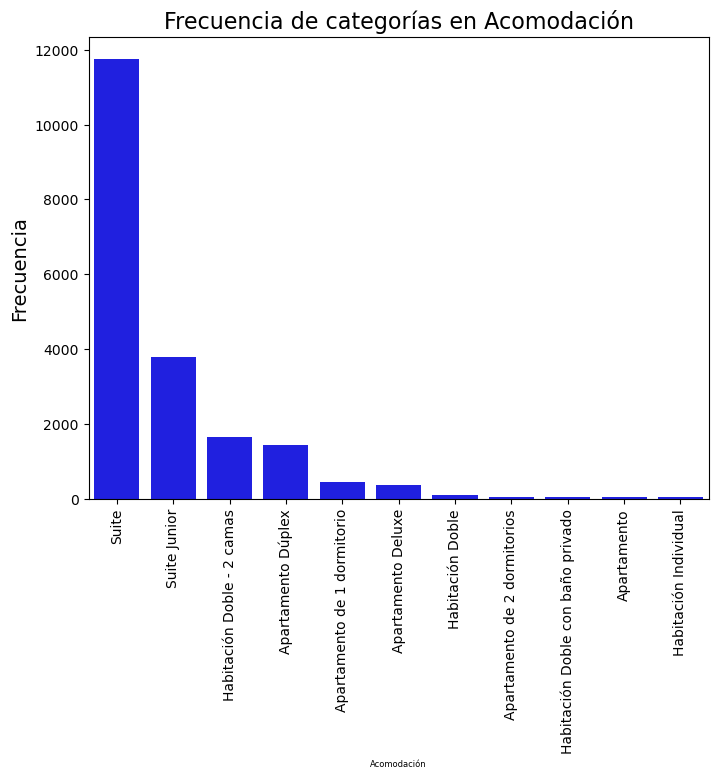

In [61]:
#Categoría de acomodaciones
columna1 = 'Acomodación'
frecuencias1 = df[columna1].value_counts()

# Eliminar categorías con pocas ocurrencias, por ejemplo, menos de 25
frecuencias_filtradas1 = frecuencias1[frecuencias1 >= 25]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencias_filtradas1.index, y=frecuencias_filtradas1.values, color='blue')
plt.title(f"Frecuencia de categorías en {columna1}", fontsize=16)
plt.xlabel(columna1, fontsize=6)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()

Se marca una tendencia de máximo 4 noches de acomodación.

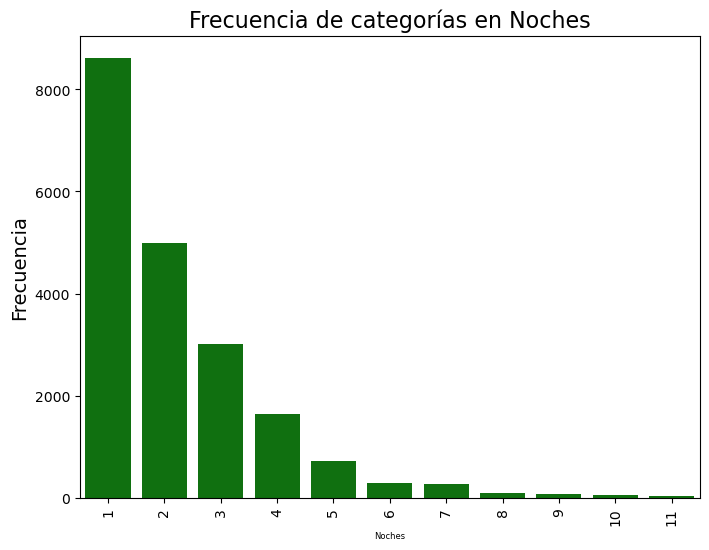

In [62]:
#Categoría de Noches
columna2 = 'Noches'
frecuencias2 = df[columna2].value_counts()

# Eliminar categorías con pocas ocurrencias, por ejemplo, menos de 25
frecuencias_filtradas2 = frecuencias2[frecuencias2 >= 25]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencias_filtradas2.index, y=frecuencias_filtradas2.values, color='green')
plt.title(f"Frecuencia de categorías en {columna2}", fontsize=16)
plt.xlabel(columna2, fontsize=6)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()

Realizamos el análisis del año donde se hizo el hospedaje

In [63]:
# Asegurarnos de que la columna con fechas esté en formato datetime (cambia 'nombre_columna_fecha' por el nombre real)
df['Fecha hospedaje'] = pd.to_datetime(df['Fecha hospedaje'])

# Extraer el año de la columna de fecha
df['año'] = df['Fecha hospedaje'].dt.year

# Mostrar las primeras filas para ver el resultado
print(df[['Fecha hospedaje', 'año']].head())

  Fecha hospedaje   año
0      2023-08-01  2023
1      2024-09-01  2024
2      2024-10-01  2024
3      2024-08-01  2024
4      2024-10-01  2024


2022, 2023 y 3024 se llevan el foco de los años de hospedaje, permitiendo concluír que 2021 estuvo marcado por la etapa postpandemia.

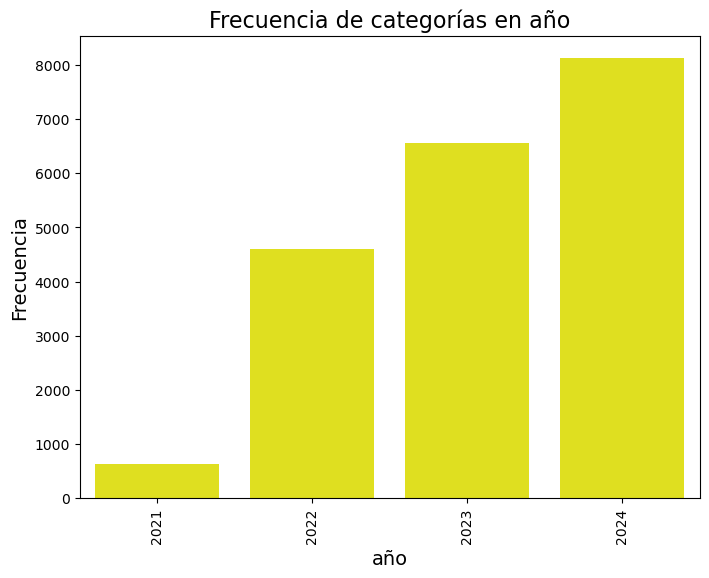

In [64]:
#Categoría de año de hospedaje
columna3 = 'año'
frecuencias3 = df[columna3].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencias3.index, y=frecuencias3.values, color='yellow')
plt.title(f"Frecuencia de categorías en {columna3}", fontsize=16)
plt.xlabel(columna3, fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()

Realizamos el mismo análisis para los años en los que se realizó la reseña.

In [65]:
# Asegurarnos de que la columna con fechas esté en formato datetime (cambia 'nombre_columna_fecha' por el nombre real)
df['Fecha reseña'] = pd.to_datetime(df['Fecha reseña'])

# Extraer el año de la columna de fecha
df['año reseña'] = df['Fecha reseña'].dt.year

# Mostrar las primeras filas para ver el resultado
print(df[['Fecha reseña', 'año reseña']].head())

  Fecha reseña  año reseña
0   2023-09-04        2023
1   2024-10-22        2024
2   2024-10-15        2024
3   2024-10-10        2024
4   2024-10-07        2024


La tendencia muestra que el año de hospedaje coincide con el año de reseña.

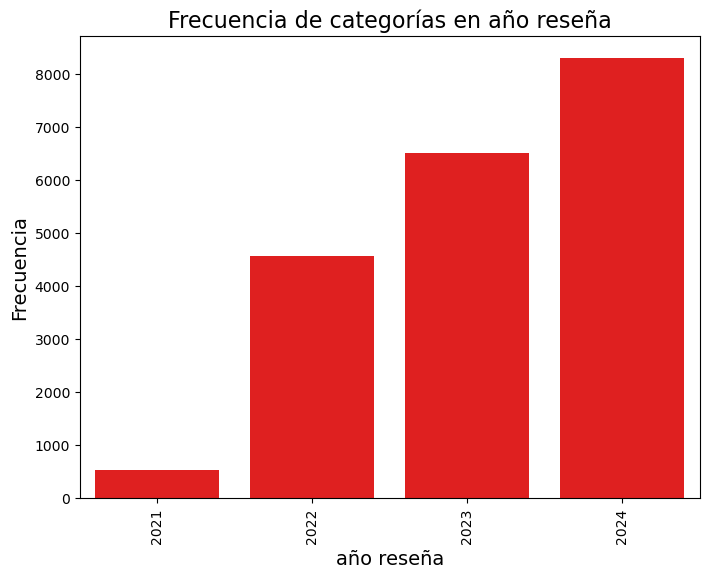

In [66]:
#Categoría de año de reseña
columna4 = 'año reseña'
frecuencias4 = df[columna4].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencias3.index, y=frecuencias4.values, color='red')
plt.title(f"Frecuencia de categorías en {columna4}", fontsize=16)
plt.xlabel(columna4, fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()

Analizamos ahora los titulos más frecuentes usados para calificar una reseña. Observamos que hay valores típicos como Excepcional, Fantástico, Muy bien y Bien.

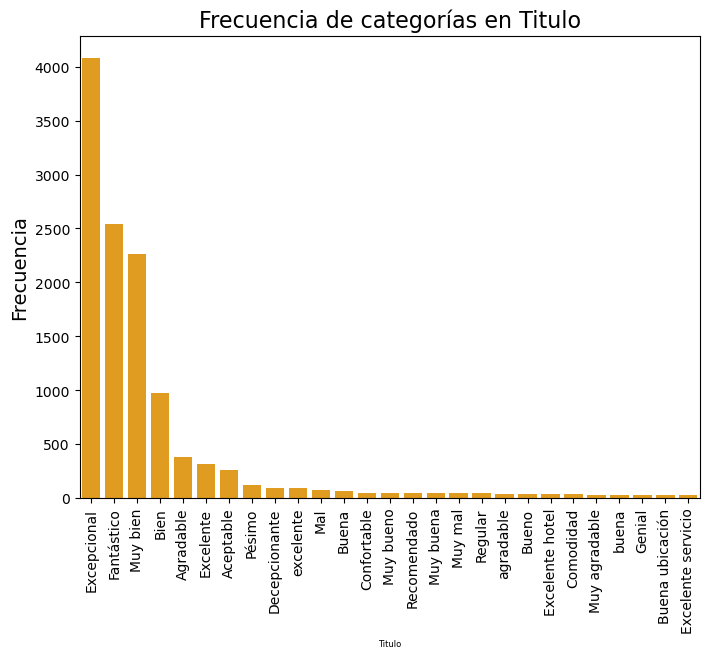

In [67]:
#Cantidad de Títulos
columna5 = 'Titulo'
frecuencias5 = df[columna5].value_counts()

# Eliminar categorías con pocas ocurrencias, por ejemplo, menos de 25
frecuencias_filtradas5 = frecuencias5[frecuencias5 >= 25]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencias_filtradas5.index, y=frecuencias_filtradas5.values, color='orange')
plt.title(f"Frecuencia de categorías en {columna5}", fontsize=16)
plt.xlabel(columna5, fontsize=6)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()

Las calificaicones oscilan en su mayoría entre 7 y 10. Destaca la gran cantidad de calificaciones en 9 y 10.

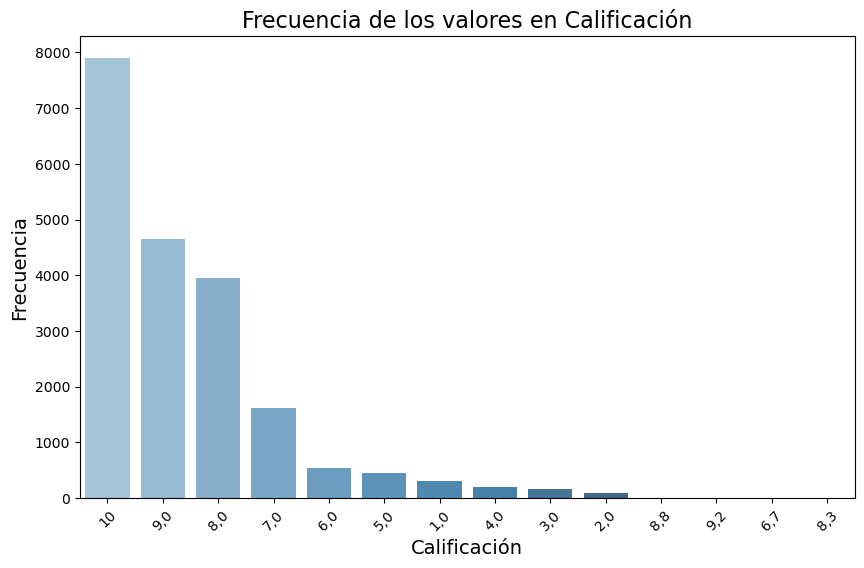

In [68]:
#Cantidad de Calificaciones
columna6 = 'Calificación'

frecuencia6 = df[columna6].value_counts()


plt.figure(figsize=(10, 6))  # Ajustar tamaño de la figura
sns.barplot(x=frecuencia6.index, y=frecuencia6.values, palette='Blues_d')  # Gráfico de barras
plt.title(f"Frecuencia de los valores en {columna6}", fontsize=16)
plt.xlabel(columna6, fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.show()

In [69]:
df["Calificación"].unique()

array(['10', '9,0', '8,0', '6,0', '7,0', '4,0', '1,0', '5,0', '8,8',
       '2,0', '3,0', '9,2', '6,7', '8,3'], dtype=object)

## Entrenar el modelo 

Procedemos a implementar un modelo de Random Forest Regressor para predecir la calificación de los huéspedes en función de varias características del hospedaje.

In [77]:
# Convertir la columna "Calificación" a numérica reemplazando comas por puntos
df["Calificación"] = df["Calificación"].astype(str).str.replace(',', '.').astype(float)

In [78]:
# Filtrar valores atípicos
df = df[df["Calificación"].between(1, 10)]

In [79]:
#Se seleccionan solo las columnas relevantes para el modelo
features = ["País", "Acomodación", "Noches", "Grupo viaje", "Días entre reseña y hospedaje"]
df = df[features + ["Calificación"]]

In [80]:
# Se eliminan filas con valores nulos 
df = df.dropna(subset=["Calificación"])

In [81]:
# Codificación de variables categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_cols = ["País", "Acomodación", "Grupo viaje"]
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

C:\Users\Diana Aldana\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
# CGenerar el dataset para el modelo
df_final = pd.concat([df[["Noches", "Días entre reseña y hospedaje", "Calificación"]], encoded_df], axis=1)

In [83]:
# Eliminar filas con valores nulos en cualquier columna restante
df_final = df_final.dropna()

In [84]:
# Preparacion de los datos para entrenar el modelo.
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df_final.drop(columns=["Calificación"]))
X = pd.DataFrame(X_imputed, columns=df_final.drop(columns=["Calificación"]).columns)
y = df_final["Calificación"].values  

In [85]:
# Escalar solo las variables predictoras para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
# Se divide datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [87]:
# Entrenamiento del modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [92]:
# Hacer predicciones
y_pred = model.predict(X_test)
y_pred

array([9.36333333, 9.5775    , 7.53333333, ..., 5.42473016, 7.546     ,
       8.3945717 ])

In [93]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 3.7799478650771685


Este valor MSE de 3.78 indica que hay margen de mejora sin embargo es significativamente mejor que con regresión lineal y funciona para el ejercicio de predecir la calificación con un rango de error

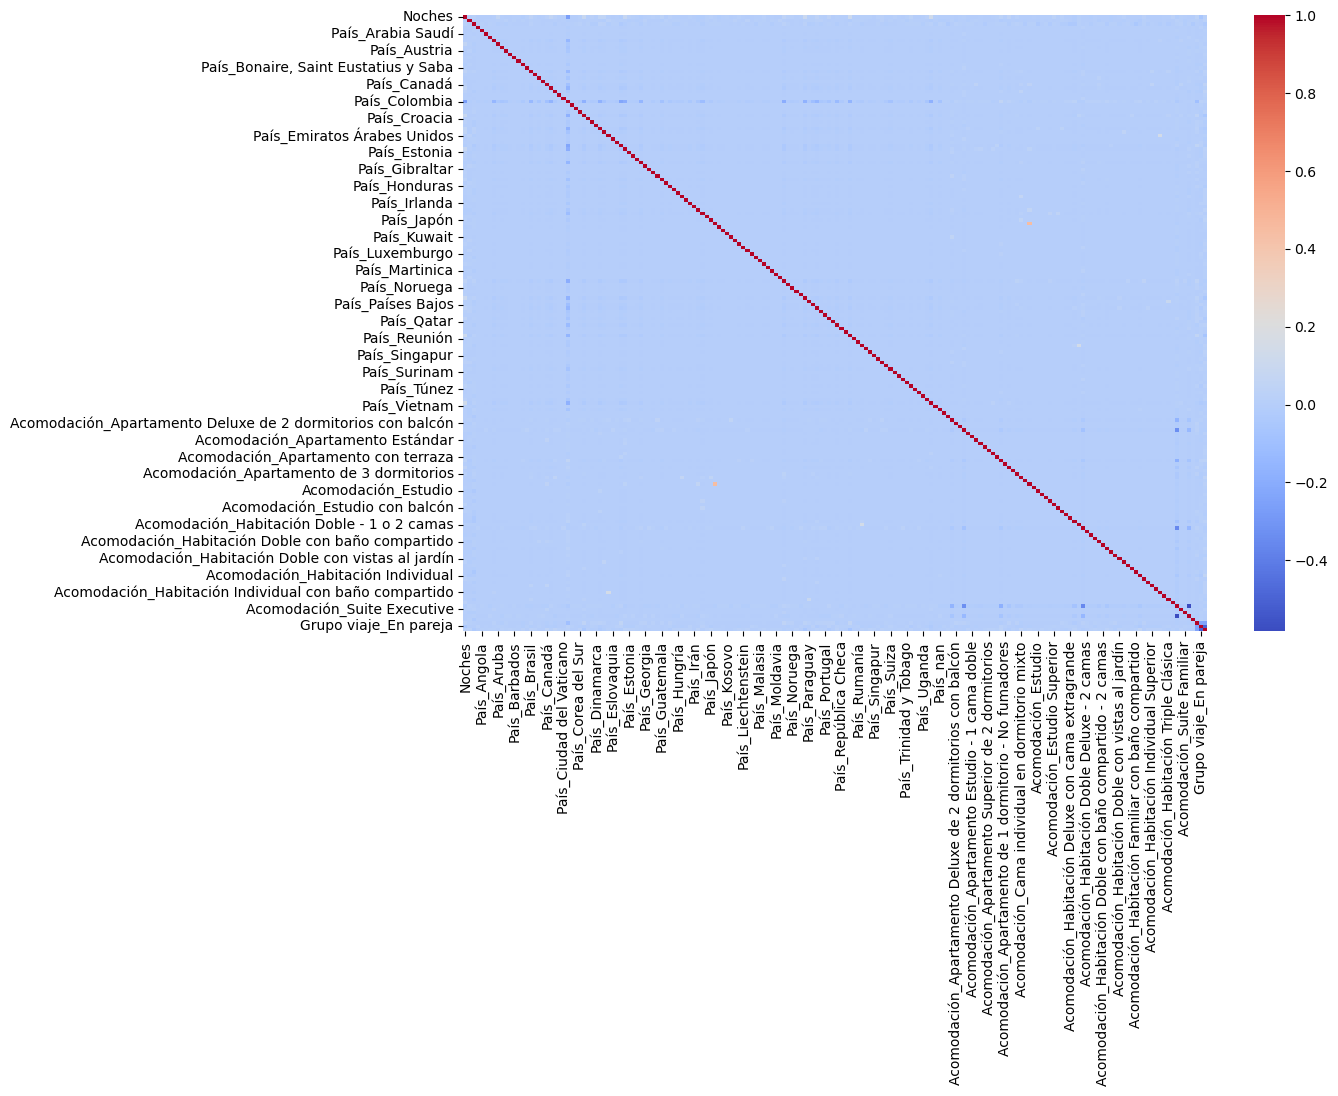

In [94]:
# Visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df_final.corr(), cmap="coolwarm", annot=False)
plt.show()

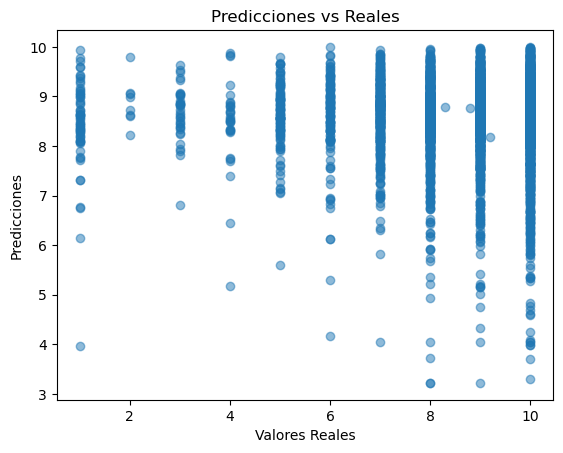

In [95]:
# Graficar predicciones vs valores reales
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Reales")
plt.show()